In [39]:
import numpy as np
from matplotlib import pyplot as plt
import io
import random

In [2]:
def square(patterns):
    x = np.sin(patterns)
    return np.where(x>=0,1,-1)

def generate_data(is_sin):
    training_patterns = np.arange(0,2*np.pi,0.1)
    test_patterns = np.arange(0.05,2*np.pi,0.1)
    

    if is_sin:
        training_targets = np.sin(2*training_patterns)
        test_targets = np.sin(2*test_patterns)
        i = np.arange(training_patterns.shape[0])
        np.random.shuffle(i)
        training_patterns=training_patterns[i]
        training_targets=training_targets[i]

        i = np.arange(test_patterns.shape[0])
        np.random.shuffle(i)
        test_patterns=test_patterns[i]
        test_targets=test_targets[i]
        return training_patterns, training_targets , test_patterns, test_targets
    
    else:
        training_targets = square(training_patterns)
        test_targets = square(test_patterns)
        i = np.arange(training_patterns.shape[0])
        np.random.shuffle(i)
        training_patterns=training_patterns[i]
        training_targets=training_targets[i]

        i = np.arange(test_patterns.shape[0])
        np.random.shuffle(i)
        test_patterns=test_patterns[i]
        test_targets=test_targets[i]
        return training_patterns, training_targets, test_patterns, test_targets


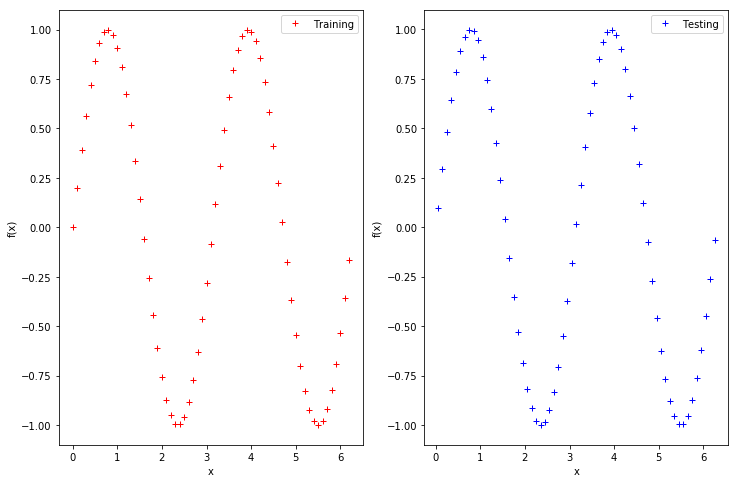

In [3]:
training_patterns, training_targets, test_patterns, test_targets = generate_data(1)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(training_patterns,training_targets, 'r+',label='Training')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()

ax2.plot(test_patterns,test_targets,'b+',label='Testing')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()

plt.show()

In [102]:
def evenly_spaced_rbf(n):
    mu_s = np.zeros((n,1))
    for i in range(n):
        mu_s[i] = i*2*np.pi/n
    return mu_s

def random_rbf(n):
    mu_s = np.zeros((n,1))
    for i in range(n):
        mu_s[i] = (2*np.random.random_sample()*np.pi)
    
    return mu_s


def soft_competetive_rbf(n,x_s,iterations,eta,radius):
    mu_s = np.zeros((n,1))
    for i in range(n):
        mu_s[i] = 4*np.pi*np.random.random_sample()-2*np.pi
    
    #mu_s = evenly_spaced_rbf(n)
    random_mu_s = np.copy(mu_s)
    #plt.scatter(mu_s,np.sin(2*mu_s), c='b', label="Before")
    plt.scatter(mu_s,np.sin(2*mu_s), c='b', label="Before")
    #print(mu_s)
    #mu_s = mu_s/np.linalg.norm(mu_s)
    #mu_s = mu_s*2*np.pi
    #print(iterations)
    for i in range(iterations):
        train_vec = x_s[np.random.randint(0,x_s.shape[0])]
        distances = np.empty((0,0))
        for mu in mu_s:
            distances = np.append(distances,(np.linalg.norm(train_vec-mu)))
        
        index = np.argmin(distances)
        winner = mu_s[index]
                
        for k,mu in enumerate(mu_s):
            mu_distance = np.linalg.norm(mu-winner)
            
            if mu_distance <= radius:
        
                mu_s[k] = mu+eta*(train_vec-mu_s[k])
        #print(ind)
        #print(distances)
        #print(abs(train_vec-closest_mu))
        #print(i)
        #mu_s = mu_s/np.linalg.norm(mu_s)
        #mu_s = mu_s*2*np.pi
        
    plt.figure()
    
    plt.scatter(mu_s,np.sin(2*mu_s), c='r', label="After")
    return mu_s, random_mu_s

def competetive_rbf2(n,x_s,iterations,eta):
    mu_s = np.zeros((n,1))
    for i in range(n):
        mu_s[i] = 2*np.pi*np.random.random_sample()
    
    #mu_s = evenly_spaced_rbf(n)
    random_mu_s = np.copy(mu_s)
    plt.figure()
    #plt.scatter(mu_s,np.sin(2*mu_s), c='b', label="Before")
    plt.scatter(mu_s,np.sin(2*mu_s), c='b', label="Before")
    #print(mu_s)
    #mu_s = mu_s/np.linalg.norm(mu_s)
    #mu_s = mu_s*2*np.pi
    #print(iterations)
    for i in range(iterations):
        train_vec = x_s[np.random.randint(0,x_s.shape[0])]
        distances = np.empty((0,0))
        for mu in mu_s:
            distances = np.append(distances,(np.linalg.norm(train_vec-mu)))
        
        index = np.argmin(distances)
        winner = mu_s[index]
        mu_s[index] = winner+eta*(train_vec-winner)
        #print(ind)
        #print(distances)
        #print(abs(train_vec-closest_mu))
        #print(i)
        #mu_s = mu_s/np.linalg.norm(mu_s)
        #mu_s = mu_s*2*np.pi
        
    #plt.figure()
    
    plt.scatter(mu_s,np.sin(2*mu_s), c='r', label="After")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig("3_3_CL_"+"_.png")
    return mu_s, random_mu_s

def competetive_rbf(n,x_s,iterations,eta,n_winners):
    mu_s = np.zeros((n,1))
    
    for i in range(n):
        mu_s[i] = 2*np.pi*np.random.random_sample()
    random_mu_s = mu_s
      
    mu_before = mu_s
    plt.figure()
    plt.scatter(mu_s,np.sin(2*mu_s), c='b', label="Before")

    for i in range(iterations):
        train_vec = x_s[np.random.randint(0,x_s.shape[0])]
        distances = np.empty((0,0))
        for mu in mu_s:
            distances = np.append(distances,(np.linalg.norm(train_vec-mu)))
        
        ind = np.argpartition(distances, -n_winners)[-n_winners:]
        
        for k in ind:
            #mu_s[k] = mu_s[k]+eta*distances[k]
            mu_s[k] = mu_s[k]+eta*(train_vec-mu_s[k])
    
    mu_after = mu_s
    #plt.figure()
    plt.scatter(mu_s,np.sin(2*mu_s), marker='+', c='r', label="After")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    #plt.savefig("3_3_CL_"+"_.png")
    
    return mu_after, mu_before


def competetive_rbf_2D(n,x_s,iterations,eta,n_winners):

    mu_s = np.amax(x_s)*np.random.random_sample((x_s.shape[0],n)) -np.absolute(np.amin(x_s))
    
    random_mu_s = mu_s
    mu_before = mu_s
    plt.scatter(mu_s[0,:],mu_s[1,:], c='b', label="Before")

    for i in range(iterations):
        train_vec = x_s[:,np.random.randint(0,x_s.shape[1])]
        train_vectors = np.empty((2,0))
        distances = np.empty((0,0))
        for j in range(mu_s.shape[1]):
            train_vec = train_vec.reshape((-1,1))
            distances = np.append(distances,(np.linalg.norm(train_vec-mu_s[:,j])))
            train_vectors = np.append(train_vectors,train_vec,axis=1)
        ind = np.argpartition(distances, -n_winners)[-n_winners:]

        for k in ind:
            mu_s[:,k] = mu_s[:,k]+eta*(train_vectors[:,k]-mu_s[:,k])
    
    mu_after = mu_s
    plt.scatter(mu_s[0,:],mu_s[1,:], marker='+', c='r', label="After")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig("3_3_CL_2D_"+"_.png")
    return mu_after, mu_before


In [103]:
def calculate_mse(f_hat,f):
    return np.mean((f_hat-f)**2)

def calculate_NMAE(f_hat,f):
    return np.mean(np.abs(f_hat-f))

def gaussian(x, mu, sigma):
    return np.exp(-(np.linalg.norm(x-mu))**2/(2*sigma**2))

    
def get_phi(x_s, mu_s,sigma):
    phi_s = np.zeros((x_s.shape[0],mu_s.shape[0]))
    for i, mu in enumerate( mu_s):
        for j,  x in enumerate( x_s):
            phi_s[j,i]=gaussian(mu,x,sigma)
    return phi_s

def get_phi_seq(x_s, mu_s,sigma):
    phi_s = np.zeros(mu_s.shape[1])
    for i, mu in enumerate( mu_s.T):
        phi_s[i]=gaussian(mu,x_s,sigma)
    return phi_s

def train_network_batch(x_s,f,mu_s,sigma):
    phi_s = get_phi(x_s,mu_s,sigma)
    w = np.matmul(np.matmul(phi_s.T,f),np.linalg.inv(np.matmul(phi_s.T,phi_s)))
    f_hat = np.sum(np.multiply(phi_s,w),axis=1)
    nmae = calculate_NMAE(f_hat,f)
    return w, nmae

def train_network_delta_rule(x_s,f,mu_s,sigma,eta, epochs):
    learning_error_list= np.zeros(epochs)
    W=np.random.randn(mu_s.shape[1],2)
    
    for i in range(epochs):
        e_list=[]
        x = np.zeros((2,1))
        for k in range(np.shape(x_s)[1]):
            x[:,0] = x_s[:,k]
            phi = get_phi_seq(x,mu_s,sigma)
            phi = phi.reshape(1,-1)
            e=f[:,k].reshape((2,1))-np.matmul(phi,W).T
            error=0.5*(e**2)
            e_list.append(error)
            W=W+eta*(e*phi).T

        learning_error=np.mean(e_list)
        learning_error_list[i] = learning_error
    
    return W, np.mean(learning_error_list)
    
def predict(x_s,mu_s,sigma,w):
    phi_s = get_phi(x_s,mu_s,sigma)
    w = w.reshape((w.shape[0],1))
    f_hat = np.sum(np.dot(phi_s,w),axis=1)
    return f_hat




mu
[[0.        ]
 [0.15707963]
 [0.31415927]
 [0.4712389 ]
 [0.62831853]
 [0.78539816]
 [0.9424778 ]
 [1.09955743]
 [1.25663706]
 [1.41371669]
 [1.57079633]
 [1.72787596]
 [1.88495559]
 [2.04203522]
 [2.19911486]
 [2.35619449]
 [2.51327412]
 [2.67035376]
 [2.82743339]
 [2.98451302]
 [3.14159265]
 [3.29867229]
 [3.45575192]
 [3.61283155]
 [3.76991118]
 [3.92699082]
 [4.08407045]
 [4.24115008]
 [4.39822972]
 [4.55530935]
 [4.71238898]
 [4.86946861]
 [5.02654825]
 [5.18362788]
 [5.34070751]
 [5.49778714]
 [5.65486678]
 [5.81194641]
 [5.96902604]
 [6.12610567]]
[[0.46831631]
 [0.63191796]
 [0.90855972]
 [1.06679143]
 [1.16007051]
 [1.19369468]
 [1.21211591]
 [1.21984866]
 [1.27225209]
 [1.48290065]
 [1.64828836]
 [1.85922231]
 [1.96475337]
 [2.36191978]
 [2.56527071]
 [2.57173319]
 [2.58595451]
 [2.72465637]
 [3.10569883]
 [3.42410326]
 [3.71089967]
 [3.9844703 ]
 [4.26145151]
 [4.43552366]
 [4.51399618]
 [4.67184978]
 [4.80358223]
 [4.83299693]
 [5.03840014]
 [5.07674578]
 [5.09047702]
 [

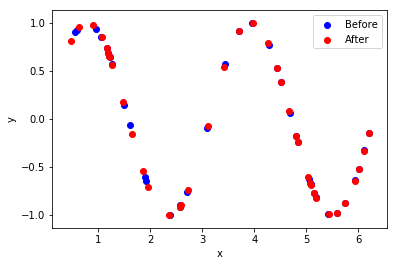

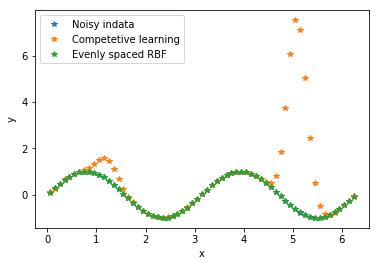

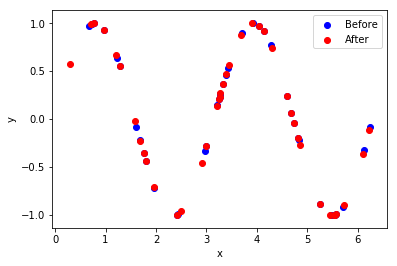

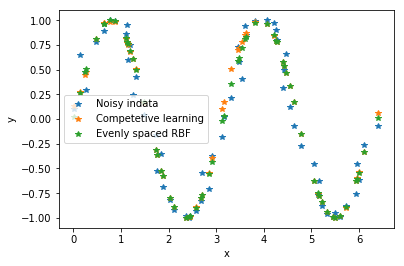

In [120]:

addNoise = [False,True]
#addNoise = [True]
sigma = 0.2
sigma_cl = 0.2
num_of_rbf = 40
eta = 1e-1
iterations = 100
nWinners = 1
repeat = 1

data_testing_es= np.zeros((repeat,len(addNoise)))
data_testing_cl = np.zeros((repeat,len(addNoise)))
data_training_es = np.zeros((repeat,len(addNoise)))
data_training_cl = np.zeros((repeat,len(addNoise)))

for i in range(repeat):
    for j,noise_ in enumerate(addNoise):
        training_patterns, training_targets, test_patterns, test_targets = generate_data(1)
        #print("patterns",training_patterns)
        #print("targets:",training_targets)
        test_targets_wo_noise = test_targets
        if noise_:
            noise=np.random.randn(training_patterns.shape[0])*0.1
            noise_test=np.random.randn(test_patterns.shape[0])*0.1
            training_patterns = training_patterns
            test_patterns = test_patterns+noise_test
            #print("patterns",training_patterns)
            #print("targets:",training_targets)

        mu_es = evenly_spaced_rbf(num_of_rbf)

        #mu_after, mu_before = competetive_rbf(num_of_rbf,training_patterns,iterations,eta,nWinners)
        mu_after, mu_before = competetive_rbf2(num_of_rbf,training_patterns,iterations,eta)
        print("mu")
        print(mu_es)
        
        mu_after = np.sort(mu_after,axis=0)
        print(mu_after)
        w_cl,nmae_cl = train_network_batch(training_patterns, training_targets,mu_after,sigma)
        w_es,nmae_es = train_network_batch(training_patterns, training_targets,mu_es,sigma)

        f_hat_cl = predict(test_patterns,mu_after,sigma,w_cl)
        f_hat_es = predict(test_patterns,mu_es,sigma,w_es)

        data_testing_es[i,j] = calculate_NMAE(f_hat_es,test_targets_wo_noise)
        data_testing_cl[i,j] = calculate_NMAE(f_hat_cl,test_targets_wo_noise)
        data_training_es[i,j] = nmae_es
        #print(data_training_es)
        data_training_cl[i,j] = nmae_cl
        plt.figure()
        plt.plot(test_patterns,test_targets_wo_noise,'*',label='Noisy indata')
        plt.plot(test_patterns,f_hat_cl,'*', label='Competetive learning')
        plt.plot(test_patterns,f_hat_es,'*',label='Evenly spaced RBF')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.savefig("3_3_1_"+str(j)+"_.png")

nmae_cl_test = np.around(np.mean(data_testing_cl,axis=0),8)
var_cl_test = np.around(np.var(data_testing_cl,axis=0),8)
nmae_es_test = np.around(np.mean(data_testing_es,axis=0),8)
var_es_test = np.around(np.var(data_testing_es,axis=0),8)

nmae_cl_train = np.around(np.mean(data_training_cl,axis=0),4)
var_cl_train = np.around(np.var(data_training_cl,axis=0),4)
nmae_es_train = np.around(np.mean(data_training_es,axis=0),8)
var_es_train = np.around(np.var(data_training_es,axis=0),8)
#print(nmae_cl_train)


Sååå det verkar som att evenly spaced är klart bättre än CL. CL är däremot bättre än helt random. Allt detta beror på vad vi har för varians och antal noder. För färre noder och högre varians står sig CL bättre mot evenly spaced.

In [121]:
print(' -------NMAE for approximating sin(2x) without Noise-------')
print('            CL            RBF')
print('Training: '+str(nmae_cl_train[0])+' ('+str(var_cl_train[0])+')    '+str(nmae_es_train[0])+' ('+str(var_es_train[0])+')')
print('Testing:  '+str(nmae_cl_test[0])+' ('+str(var_cl_test[0])+')    '+str(nmae_es_test[0])+' ('+str(var_es_test[0])+')')
print('')
print(' -------NMAE for approximating sin(2x) with Noise-------')
print('            CL                   RBF')
print('Training: '+str(nmae_cl_train[1])+' ('+str(var_cl_train[1])+')    '+str(nmae_es_train[1])+' ('+str(var_es_train[1])+')')
print('Testing:  '+str(nmae_cl_test[1])+' ('+str(var_cl_test[1])+')    '+str(nmae_es_test[1])+' ('+str(var_es_test[1])+')')

 -------NMAE for approximating sin(2x) without Noise-------
            CL            RBF
Training: 0.7228 (0.0)    0.00089111 (0.0)
Testing:  0.72196605 (0.0)    0.00138718 (0.0)

 -------NMAE for approximating sin(2x) with Noise-------
            CL                   RBF
Training: 0.019 (0.0)    0.00089111 (0.0)
Testing:  0.10715012 (0.0)    0.09938568 (0.0)


In [33]:
iterations_2D = 10
data = open("data_lab2/ballist.dat").read().replace('\t',' ')
ballistic_data = np.loadtxt(io.StringIO(data),skiprows=0, delimiter=" ")

data2 = open("data_lab2/balltest.dat").read().replace('\t',' ')
balltest_data = np.loadtxt(io.StringIO(data2), delimiter=" ", skiprows=0)

train_X = ballistic_data[:,0:2]
train_Y = ballistic_data[:,2:4]
test_X = balltest_data[:,0:2]
test_Y = balltest_data[:,2:4]

train_X = train_X.T
train_Y = train_Y.T

mu_after_2D, mu_before_2D = competetive_rbf_2D(num_of_rbf,train_X,iterations_2D,eta,nWinners)

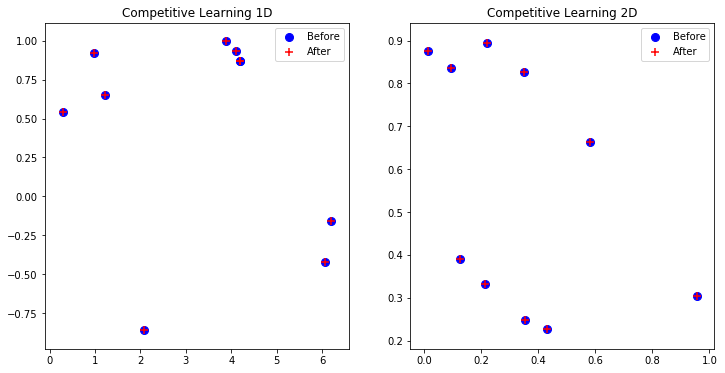

In [34]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(mu_before,np.sin(2*mu_before), marker='o', s=64, c='b', label="Before")
ax1.scatter(mu_after,np.sin(2*mu_after), marker='+', s=64, c='r', label="After")
ax1.set_title('Competitive Learning 1D')
ax1.legend()


ax2.scatter(mu_before_2D[0,:],mu_before_2D[1,:], marker='o', s=64, c='b', label="Before")
ax2.scatter(mu_after_2D[0,:],mu_after_2D[1,:], marker='+', s=64, c='r', label="After")
ax2.set_title('Competitive Learning 2D')
ax2.legend()

plt.show()